In [1]:
#importing important libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,SimpleRNN,LSTM
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [2]:
#Loading and exploring tesla dataset
data=pd.read_csv('TSLA.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
data.columns = data.columns.str.strip()
# Step 2: Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])
# Step 3: Set 'Date' as index
data.set_index('Date', inplace=True)
# Check the result
print(data.head())


                 Open   High        Low      Close  Adj Close    Volume
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900


In [4]:
# Scaling and Sequence Creation
close_data = data['Close'].values
# Reshape and Scale the data
scaler = MinMaxScaler()
close_scaled = scaler.fit_transform(close_data.reshape(-1, 1))
x = []
y = []
# Create sequences: 60 previous values → next value
for i in range(60, len(close_scaled)):
    x.append(close_scaled[i-60:i])
    y.append(close_scaled[i])
# Convert to numpy arrays
X = np.array(x)
y = np.array(y)
# Reshape X for RNN/LSTM: [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
# Print shapes
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2356, 60, 1)
y shape: (2356, 1)


In [5]:
# 1. Build the SimpleRNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for predicting the closing price
# 2. Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# 3. Train-Test Split (reuse if not already split)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
# 4. Fit the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)


Epoch 1/20


C:\Users\mahes\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0307 - val_loss: 0.0017
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014 - val_loss: 0.0044
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.4079e-04 - val_loss: 6.9859e-04
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.9713e-04 - val_loss: 0.0020
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.8893e-04 - val_loss: 8.9700e-04
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.0410e-04 - val_loss: 4.3505e-04
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.2256e-04 - val_loss: 5.8613e-04
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.6543e-04 - val_loss: 4.7577e-04
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.0417e-04 - val_loss: 5.0658e-04
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.0695e-04 - val_loss: 4.7939e-04
Epoch 12/20
53

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


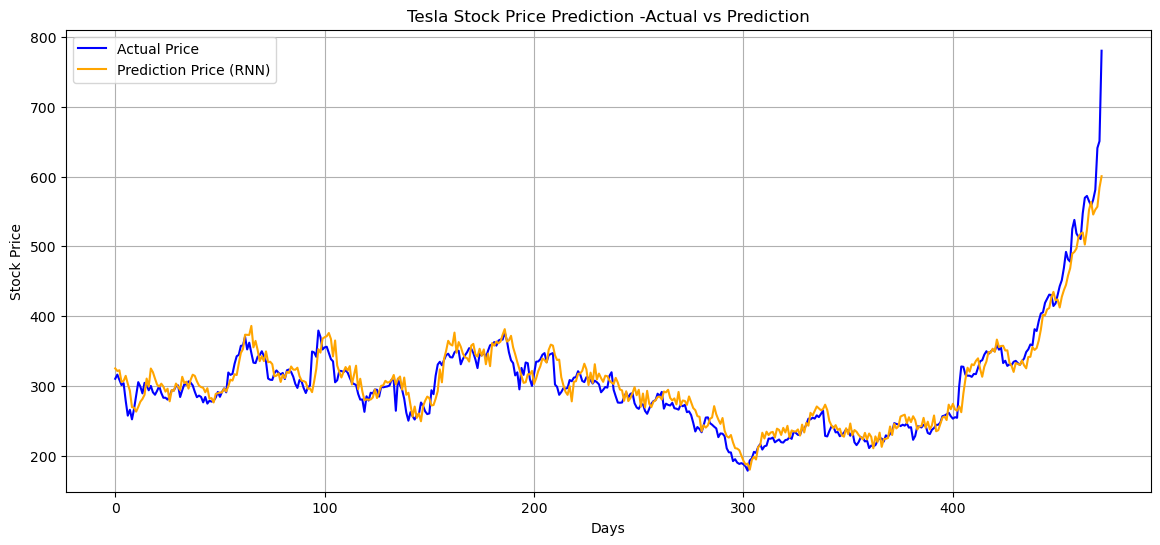

In [6]:
#Predictions,Visualizaion and MSE
#prediction using the trained model 
y_pred_scaled=model.predict(X_test)
y_pred=scaler.inverse_transform(y_pred_scaled)
y_true=scaler.inverse_transform(y_test)
plt.figure(figsize=(14,6))
plt.plot(y_true,label='Actual Price',color='blue')
plt.plot(y_pred,label='Prediction Price (RNN)',color='orange')
plt.title('Tesla Stock Price Prediction -Actual vs Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
y_pred shape: (472, 1)
y_true shape: (472, 1)
Mean Squared Error (MSE): 389.8666


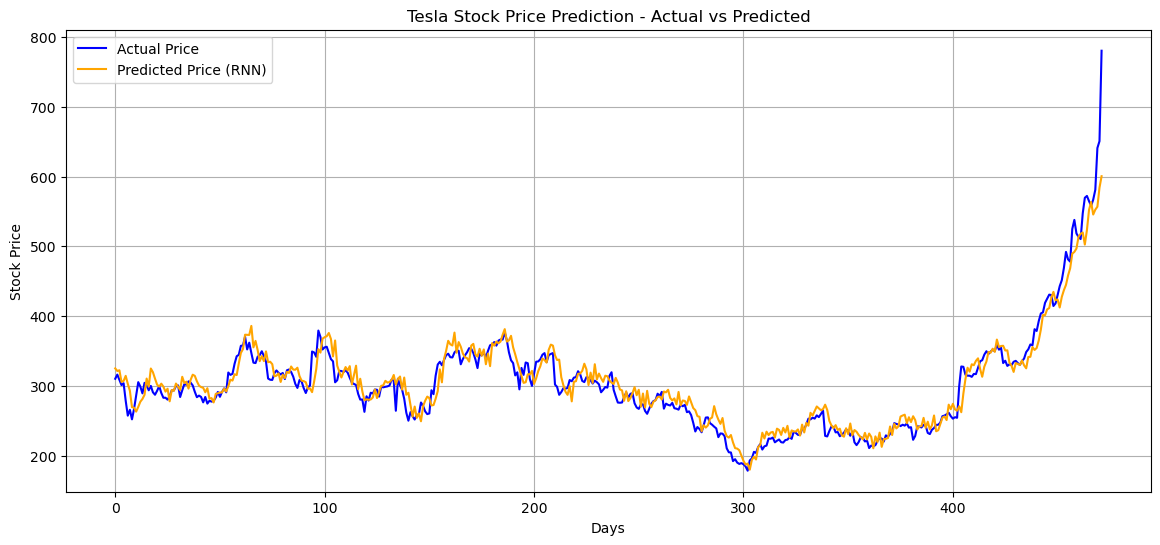

In [7]:
#Predictions,Visualizaion and MSE
# Predict on test data
y_pred_scaled = model.predict(X_test)
if len(y_test.shape) == 1:
    y_test = y_test.reshape(-1, 1)
# Inverse transform both y_pred and y_test
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test)
# Verify shapes match
print("y_pred shape:", y_pred.shape)
print("y_true shape:", y_true.shape)
# calculate MSE
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(y_true, label='Actual Price', color='blue')
plt.plot(y_pred, label='Predicted Price (RNN)', color='orange')
plt.title('Tesla Stock Price Prediction - Actual vs Predicted')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# 1. Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
# 2. Compile
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
# 3. Train
history_lstm = lstm_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)


Epoch 1/20


C:\Users\mahes\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0107 - val_loss: 3.6716e-04
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 6.9423e-04 - val_loss: 5.0730e-04
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 5.9901e-04 - val_loss: 3.4678e-04
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 5.0632e-04 - val_loss: 3.4923e-04
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4.8684e-04 - val_loss: 5.2826e-04
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.5580e-04 - val_loss: 3.6926e-04
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.9680e-04 - val_loss: 3.4289e-04
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 3.9414e-04 - val_loss: 3.1958e-04
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.4074e-04 - val_loss: 3.3076e-04
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.0954e-04 - val_loss: 5.0107e-04
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.6070e-04 - val_loss: 3

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


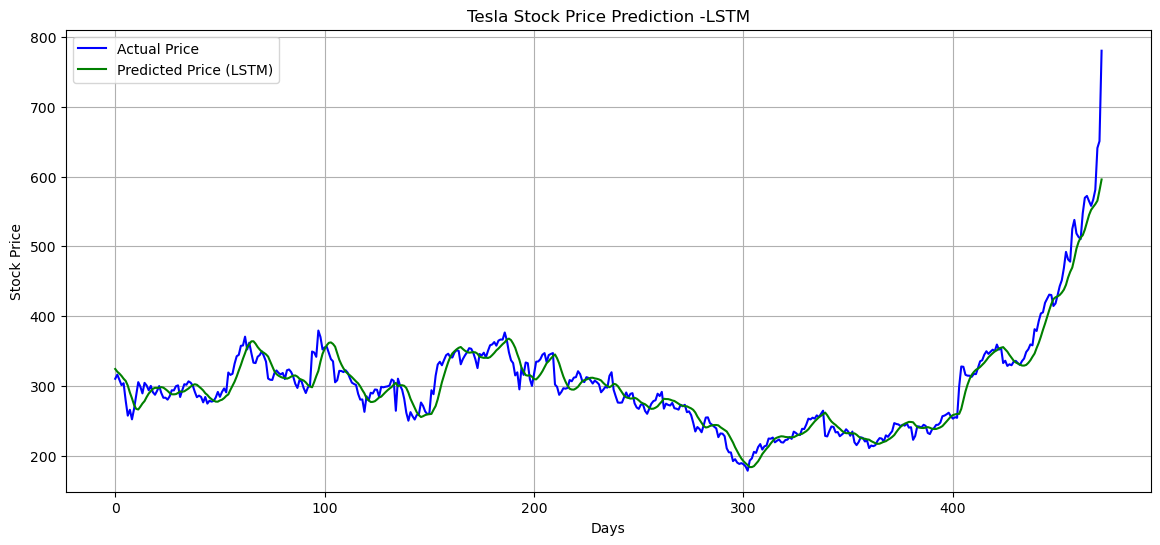

In [9]:
#Prediction with LSTM and Evaluation 
y_pred_lstm_scaled=lstm_model.predict(X_test)
if len(y_test.shape)==1:
    y_test=y_test.reshape(-1,1)
y_pred_lstm=scaler.inverse_transform(y_pred_lstm_scaled)
y_true_lstm=scaler.inverse_transform(y_test)
plt.figure(figsize=(14,6))
plt.plot(y_true_lstm,label='Actual Price',color='blue')
plt.plot(y_pred_lstm,label='Predicted Price (LSTM)',color='green')
plt.title('Tesla Stock Price Prediction -LSTM')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

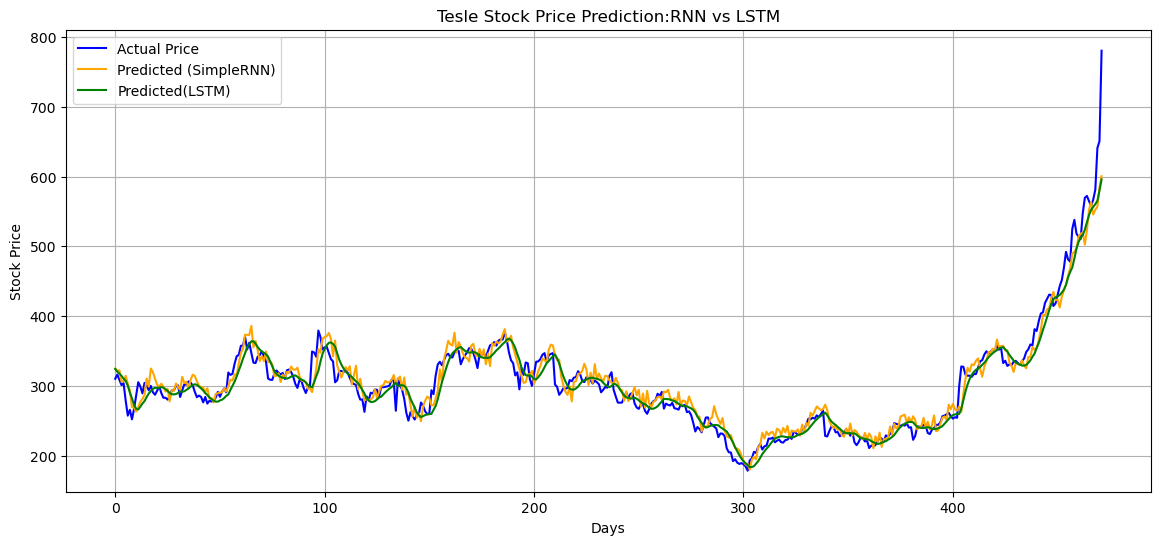

In [10]:
#Comparing RNN and LSTM moddel Predictions
plt.figure(figsize=(14,6))
plt.plot(y_true,label='Actual Price',color='blue')
plt.plot(y_pred,label='Predicted (SimpleRNN)',color='orange')
plt.plot(y_pred_lstm,label='Predicted(LSTM)',color='green')
plt.title('Tesle Stock Price Prediction:RNN vs LSTM')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
#Predicting the next 5 and 10 days of tesla stock price 
def predict_future(model,last_sequence,days,scalar):
    predictions=[]
    input_seq=last_sequence.copy()
    for _ in range(days):
        input_reshaped=input_seq.reshape(1,60,1)
        next_pred=model.predict(input_reshaped,verbose=0)[0][0]
        predictions.append(next_pred)
        input_seq=np.append(input_seq[1:],[[next_pred]],axis=0)
    return scaler.inverse_transform(np.array(predictions).reshape(-1,1))
last_60_days=X_test[-1]
future_5_lstm=predict_future(lstm_model,last_60_days,5,scaler)
future_10_lstm=predict_future(lstm_model,last_60_days,10,scaler) 
print("LSTM 5-Day Forecast:")
print(future_5_lstm.flatten())
print("\n LSTM 10-Day Forcast:")
print(future_10_lstm.flatten())

LSTM 5-Day Forecast:
[595.75934 600.37    603.2506  604.39996 604.1533 ]

 LSTM 10-Day Forcast:
[595.75934 600.37    603.2506  604.39996 604.1533  602.76624 600.43567
 597.319   593.5455  589.2245 ]


In [12]:
!pip install scikeras

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
def create_model(units=50, dropout=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(units=units))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


In [14]:
from scikeras.wrappers import KerasRegressor

model = KerasRegressor(
    model=create_model,
    verbose=0,
    units=50,
    dropout=0.2,
    learning_rate=0.001,
    epochs=10,
    batch_size=32
)


In [15]:
param_grid = {
    'units': [50, 100],
    'dropout': [0.2, 0.3],
    'learning_rate': [0.001, 0.0005],
    'batch_size': [32],
    'epochs': [10]
}


In [16]:
#from sklearn.model_selection import GridSearchCV
#grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
#grid_result = grid.fit(X_train, y_train)

In [17]:
#print("Best parameters found:", grid_result.best_params_)
#print("Best score:", grid_result.best_score_)


In [18]:
#Business Use Cases 

In [19]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

# Define the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile and train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20


C:\Users\mahes\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0249
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 9.5050e-04
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 6.9757e-04
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 7.3980e-04
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 6.3526e-04
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 6.8139e-04
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 5.5119e-04
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 5.3409e-04
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 5.9582e-04
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 5.2352e-04
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 5.5212e-04
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 5.1613e-04
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 4.8713e-04
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 4.3836e-04
Epoch 15/20
59/59 ━━━━━━━━━━━━

 Final Portfolio Value: ₹156043.72
   Actual Price  Predicted Price (Tomorrow) Action  Portfolio Value
0    310.549988                  325.213287    BUY    100000.000000
1    316.529999                  322.509216   HOLD    101925.619459
2    309.100006                  319.629608   HOLD     99533.092238
3    301.540009                  316.309387   HOLD     97098.702512
4    304.179993                  313.158325   HOLD     97948.802046


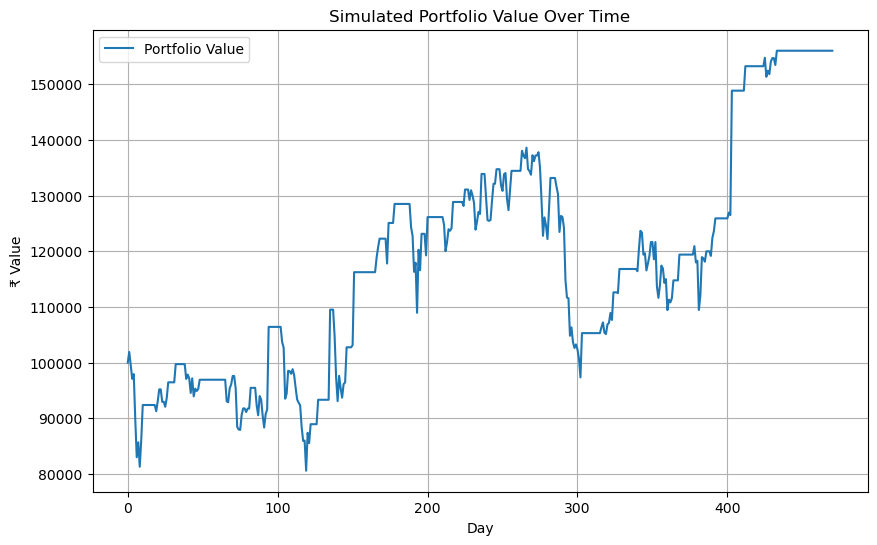

In [20]:
#1.Stock Market Trading & Investnent Strategies 
#Automated Testing 
# Simulate capital and actions
initial_cash = 100000  # ₹1 lakh
cash = initial_cash
shares = 0
portfolio_values = []
actions = []

# Predict
predicted_prices = model.predict(X_test, verbose=0)
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Trading strategy
for i in range(len(predicted_prices) - 1):
    today_actual = actual_prices[i][0]
    tomorrow_pred = predicted_prices[i + 1][0]

    if tomorrow_pred > today_actual and cash > 0:
        shares = cash / today_actual
        cash = 0
        actions.append("BUY")
    elif tomorrow_pred < today_actual and shares > 0:
        cash = shares * today_actual
        shares = 0
        actions.append("SELL")
    else:
        actions.append("HOLD")

    portfolio_value = cash + shares * today_actual
    portfolio_values.append(portfolio_value)

# Final results
final_portfolio_value = portfolio_values[-1]
print(f" Final Portfolio Value: ₹{final_portfolio_value:.2f}")

# DataFrame of actions
trading_df = pd.DataFrame({
    'Actual Price': actual_prices[:-1].flatten(),
    'Predicted Price (Tomorrow)': predicted_prices[1:].flatten(),
    'Action': actions,
    'Portfolio Value': portfolio_values
})

print(trading_df.head())

# Plot
plt.figure(figsize=(10, 6))
plt.plot(trading_df['Portfolio Value'], label='Portfolio Value')
plt.title('Simulated Portfolio Value Over Time')
plt.xlabel('Day')
plt.ylabel('₹ Value')
plt.legend()
plt.grid(True)
plt.show()


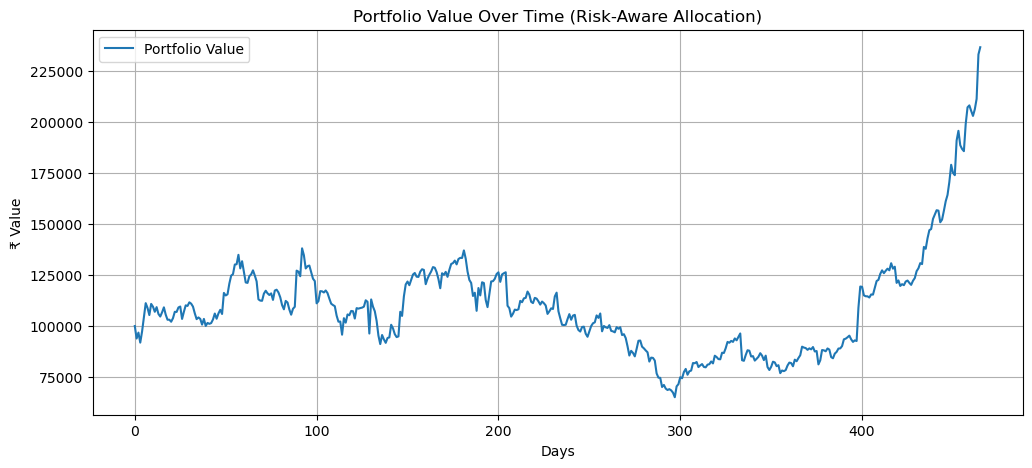

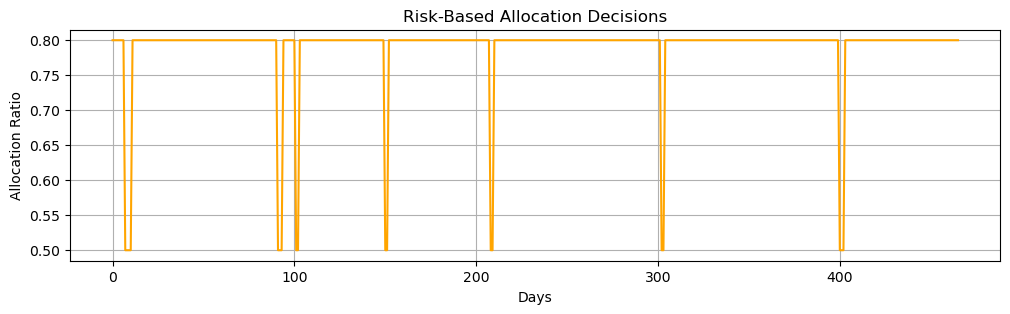

In [21]:
#Risk Management & Portfolio Optimization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- STEP 1: Predict future prices using your trained LSTM model ---
predicted_prices = model.predict(X_test, verbose=0)
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# --- STEP 2: Calculate daily returns and volatility ---
predicted_series = pd.Series(predicted_prices.flatten())
returns = predicted_series.pct_change().dropna()

# Calculate rolling volatility (standard deviation)
rolling_volatility = returns.rolling(window=5).std()

# --- STEP 3: Simulate portfolio allocation based on volatility ---
initial_cash = 100000  # ₹1,00,000
cash = initial_cash
shares = 0
portfolio_values = []
allocations = []

# Simple allocation logic:
# Low volatility → invest more (80%), high volatility → invest less (20%)

for i in range(5, len(predicted_prices) - 1):
    today_price = actual_prices[i][0]
    vol = rolling_volatility.iloc[i - 1]

    if not np.isnan(vol):
        # Risk-based allocation (invert vol, scaled)
        if vol < 0.01:
            allocation_ratio = 0.8
        elif vol < 0.03:
            allocation_ratio = 0.5
        else:
            allocation_ratio = 0.2
    else:
        allocation_ratio = 0.5

    invest_amount = cash * allocation_ratio
    shares_bought = invest_amount / today_price
    shares += shares_bought
    cash -= invest_amount

    portfolio_value = cash + shares * today_price
    portfolio_values.append(portfolio_value)
    allocations.append(allocation_ratio)

# --- STEP 4: Visualization ---
plt.figure(figsize=(12, 5))
plt.plot(portfolio_values, label='Portfolio Value')
plt.title("Portfolio Value Over Time (Risk-Aware Allocation)")
plt.xlabel("Days")
plt.ylabel("₹ Value")
plt.legend()
plt.grid(True)
plt.show()

# Allocation strategy visual
plt.figure(figsize=(12, 3))
plt.plot(allocations, label='Allocation % (of cash)', color='orange')
plt.title("Risk-Based Allocation Decisions")
plt.ylabel("Allocation Ratio")
plt.xlabel("Days")
plt.grid(True)
plt.show()


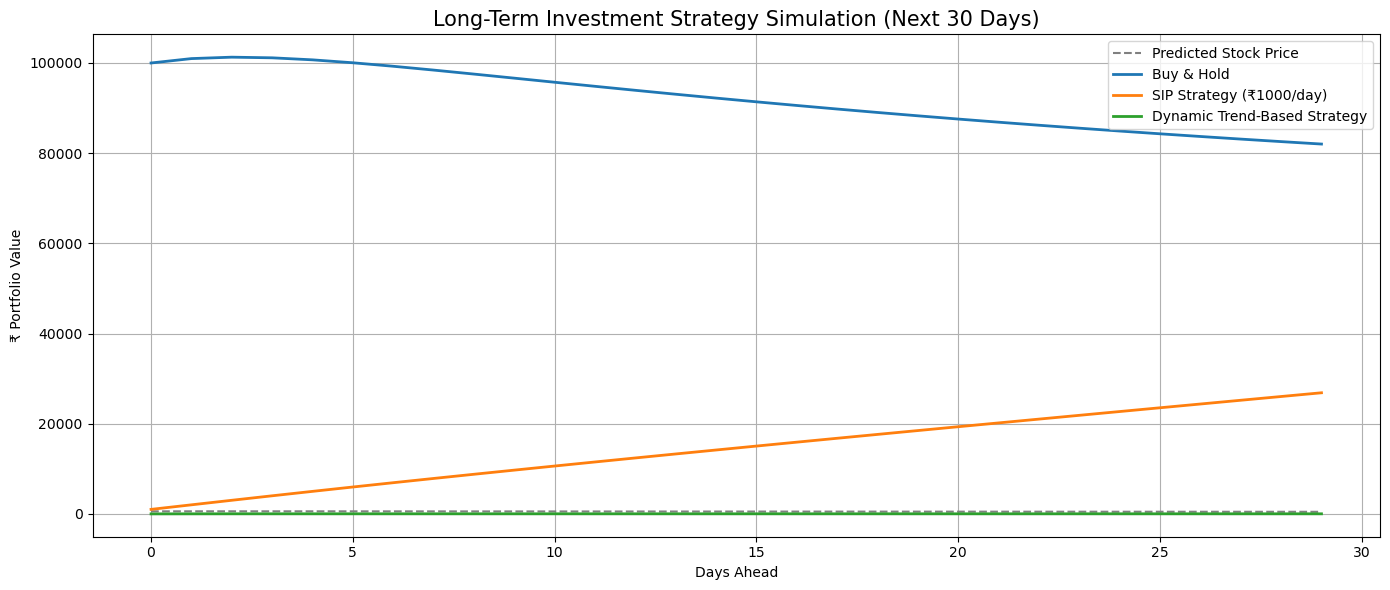

In [22]:
#2. Financial Forecasting & Time-Series Analysis.
#Long term investment Planning
# STEP 1: Forecast next 30 days using the trained model
n_days = 30
future_predictions = []

# Make sure current_input is 3D: (1, time_steps, features)
current_input = X_test[-1].reshape(1, X_test.shape[1], X_test.shape[2])

for _ in range(n_days):
    prediction = model.predict(current_input, verbose=0)
    future_predictions.append(prediction[0][0])

    # Prepare new input by appending prediction and removing oldest timestep
    prediction_reshaped = prediction.reshape(1, 1, 1)
    current_input = np.concatenate((current_input[:, 1:, :], prediction_reshaped), axis=1)

# Inverse transform predictions back to original scale
future_prices = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# STEP 2: Simulate Investment Strategies

# 1. Buy and Hold
buy_price = future_prices[0][0]
initial_investment = 100000
buy_and_hold_value = [initial_investment * (price / buy_price) for price in future_prices.flatten()]

# 2. SIP Strategy (₹1000 per day)
sip_amount = 1000
total_units = 0
portfolio_value_sip = []
cash_flow = 0

for price in future_prices.flatten():
    units_bought = sip_amount / price
    total_units += units_bought
    cash_flow += sip_amount
    portfolio_value_sip.append(total_units * price)

# 3. Dynamic Trend-Based Hold/Sell Strategy
trend_strategy = []
holding_units = 0
cash = 0

for i in range(len(future_prices) - 1):
    today = future_prices[i][0]
    tomorrow = future_prices[i + 1][0]

    if tomorrow > today:
        # Buy or hold
        units = 1000 / today
        holding_units += units
        cash -= 1000
    else:
        # Sell all
        cash += holding_units * today
        holding_units = 0

    trend_strategy.append(holding_units * today + cash)

# Final value at end if still holding units
trend_strategy.append(holding_units * future_prices[-1][0] + cash)

# STEP 3: Plot all strategies
plt.figure(figsize=(14, 6))
plt.plot(future_prices, label='Predicted Stock Price', color='gray', linestyle='--')
plt.plot(buy_and_hold_value, label='Buy & Hold', linewidth=2)
plt.plot(portfolio_value_sip, label='SIP Strategy (₹1000/day)', linewidth=2)
plt.plot(trend_strategy, label='Dynamic Trend-Based Strategy', linewidth=2)
plt.title('Long-Term Investment Strategy Simulation (Next 30 Days)', fontsize=15)
plt.xlabel('Days Ahead')
plt.ylabel('₹ Portfolio Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


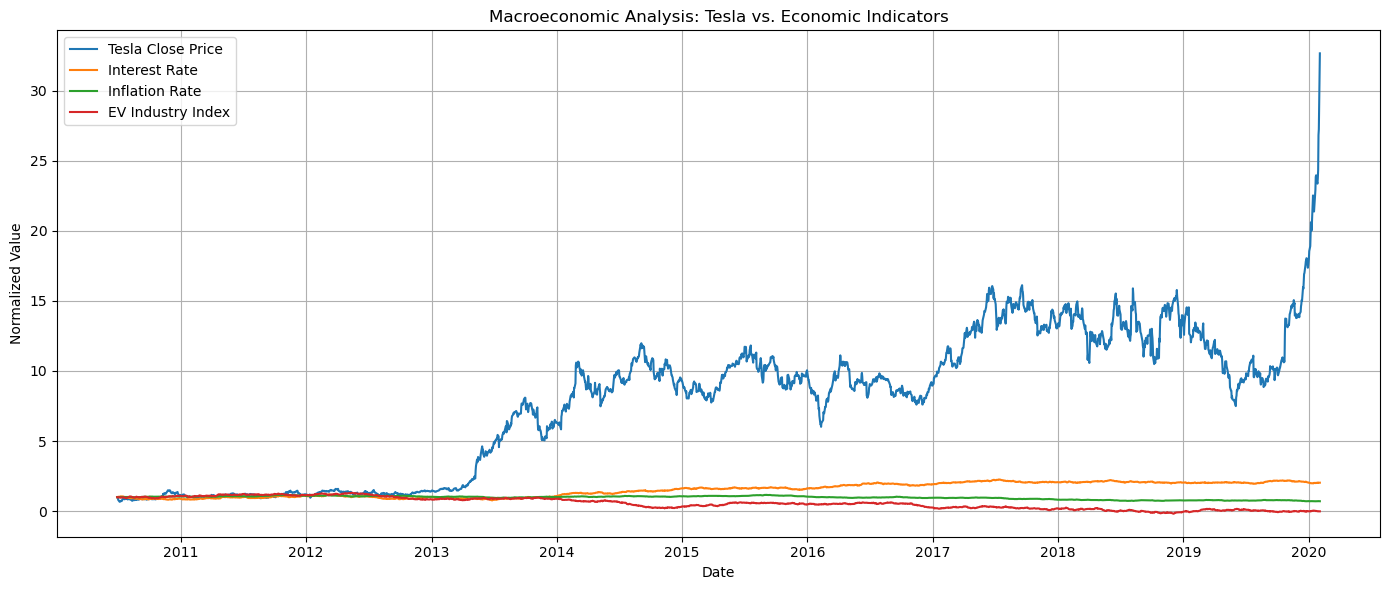

In [23]:
#Macroeconomic Analysis:
# Load Tesla stock data
tesla_df = pd.read_csv("TSLA.csv")
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
tesla_df.set_index('Date', inplace=True)
tesla_df = tesla_df.sort_index()

# Create synthetic macroeconomic indicators
np.random.seed(42)
macro_df = pd.DataFrame(index=tesla_df.index)
macro_df['Interest Rate'] = 1.5 + np.cumsum(np.random.normal(0, 0.02, len(macro_df)))
macro_df['Inflation Rate'] = 2.0 + np.cumsum(np.random.normal(0, 0.01, len(macro_df)))
macro_df['EV Industry Index'] = 100 + np.cumsum(np.random.normal(0, 1.5, len(macro_df)))

# Merge Tesla and macroeconomic data
macro_merged = macro_df.copy()
macro_merged['Tesla Close'] = tesla_df['Close']
macro_merged.dropna(inplace=True)

# Normalize for comparison
normalized_data = macro_merged / macro_merged.iloc[0]

# Plot
plt.figure(figsize=(14, 6))
plt.plot(normalized_data['Tesla Close'], label='Tesla Close Price')
plt.plot(normalized_data['Interest Rate'], label='Interest Rate')
plt.plot(normalized_data['Inflation Rate'], label='Inflation Rate')
plt.plot(normalized_data['EV Industry Index'], label='EV Industry Index')

plt.title("Macroeconomic Analysis: Tesla vs. Economic Indicators")
plt.xlabel("Date")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/20


C:\Users\mahes\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0890
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0020
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0013
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0012
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.1969e-04
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 7.9354e-04
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.3843e-04
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.2263e-04
Epoch 9/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 7.7571e-04
Epoch 10/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 7.7876e-04
Epoch 11/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.8264e-04
Epoch 12/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.3828e-04
Epoch 13/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.3455e-04
Epoch 14/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.7712e-04
Epoch 15/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 

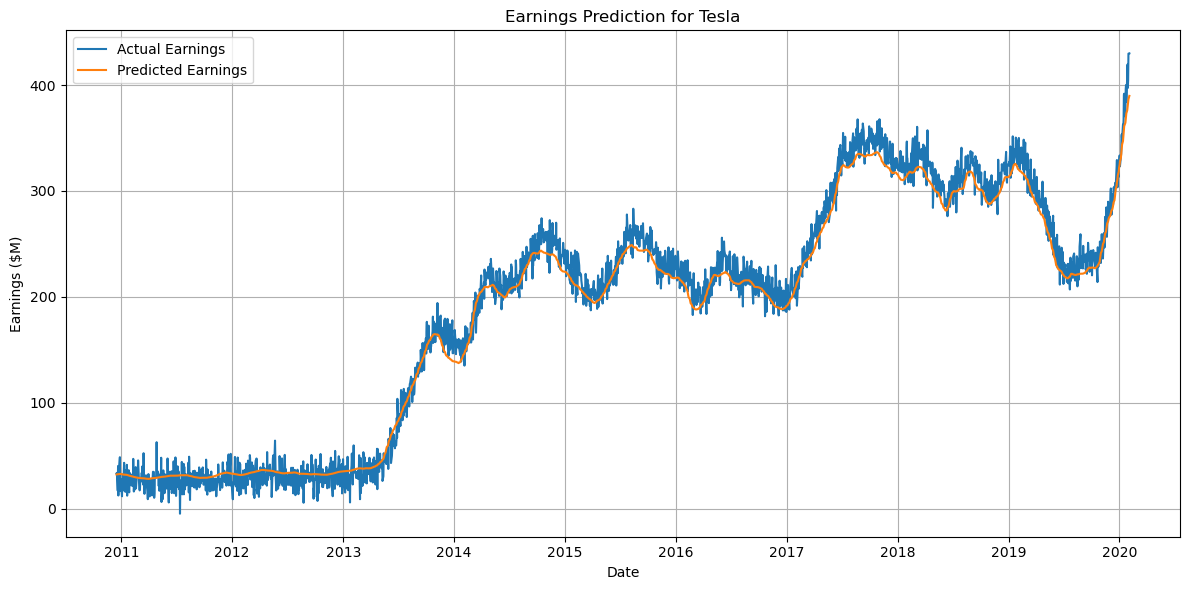

In [24]:
#3. Business & Corporate Use Cases
#Company Valuation & Earnings Prediction:
# Load your Tesla stock data
df = pd.read_csv("TSLA.csv", parse_dates=["Date"])
df.sort_values("Date", inplace=True)
df.set_index("Date", inplace=True)

# Simulate earnings (quarterly) based on historical stock price trends
np.random.seed(42)
df['Earnings'] = df['Close'].rolling(window=60).mean() + np.random.normal(0, 10, len(df))

# Drop NaNs from rolling mean
df.dropna(inplace=True)

# Normalize input features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close', 'Earnings']])

# Create sequences for LSTM
X, y = [], []
window_size = 60
for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i - window_size:i, 0])  # use 'Close' prices
    y.append(scaled_data[i, 1])  # predict 'Earnings'

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Predict earnings
predicted_earnings = model.predict(X)

# Inverse transform predictions to actual scale
actual = scaler.inverse_transform(np.hstack((X[:, -1], y.reshape(-1, 1))))
predicted = scaler.inverse_transform(np.hstack((X[:, -1], predicted_earnings)))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index[window_size:], actual[:, 1], label="Actual Earnings")
plt.plot(df.index[window_size:], predicted[:, 1], label="Predicted Earnings")
plt.title("Earnings Prediction for Tesla")
plt.xlabel("Date")
plt.ylabel("Earnings ($M)")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()


In [25]:
# Use only the 'Close' column
df = pd.read_csv("TSLA.csv")
data = df[['Close']].values

# Fit scaler on 1D data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model_lstm = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5


C:\Users\mahes\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0205
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.3497e-04
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.4556e-04
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.4913e-04
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0403e-04


In [27]:
from tensorflow.keras.layers import GRU

model_gru = Sequential([
    GRU(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
model_gru.compile(optimizer='adam', loss='mse')
model_gru.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0401
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.4394e-04
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.4244e-04
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.3606e-04
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.1925e-04
